<a href="https://colab.research.google.com/github/RaminParker/PrincipalComponentAnalysis_PCA/blob/master/PCA_theory_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis

**PCA:** method for reducing the dimensionality of data.

**What is it doing:** Data with m-columns (features) is projected into a subspace with m or fewer columns.

In [0]:
import numpy as np
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig


from numpy import array
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Manually Calculate Principal Component Analysis

Define the data of the dataset


In [0]:
A = array([[90, 60, 90], [90, 90, 30], [60, 60,60], [60, 60, 90], [30, 30, 30]])
print(A)

[[90 60 90]
 [90 90 30]
 [60 60 60]
 [60 60 90]
 [30 30 30]]


Calculate the mean of each column:

In [0]:
M=A.mean(0)
print(M)

[66. 60. 60.]


Center columns by subtracting column means

In [0]:
C=A-M
print(C)

[[ 24.   0.  30.]
 [ 24.  30. -30.]
 [ -6.   0.   0.]
 [ -6.   0.  30.]
 [-36. -30. -30.]]


Calculate variance-covariance matrix (cross-covariance matrix) of centered matrix

In [0]:
V=cov(C.T)
V
print('NumPy cross-covariance matrix: \n%s' %V)

NumPy cross-covariance matrix: 
[[630. 450. 225.]
 [450. 450.   0.]
 [225.   0. 900.]]


If you don't want to use the pre-defined function:

In [0]:
# mean_vec = np.mean(A, axis=0)
# cov_mat = (A - mean_vec).T.dot((A - mean_vec)) / (A.shape[0]-1)
# print('Cross-covariance matrix \n%s' %cov_mat)

Obtain the eigenvalues and eigenvectors of the cross-covariance matrix:

In [0]:
eigenvalues, eigenvectors = eig(V)

print(eigenvalues)
print()
print(eigenvectors)

[  56.02457535 1137.5874413   786.38798335]

[[ 0.6487899  -0.65580225 -0.3859988 ]
 [-0.74104991 -0.4291978  -0.51636642]
 [-0.17296443 -0.62105769  0.7644414 ]]


Choose the *k* eigenvectors that correspond to the *k* largest eigenvalues (where *k* is the number of dimensions of the new feature subspace) --> then you get the **projection matrix**

**Projection onto the new feature space:** The eigenvectors and eigenvalues are taken as the principal components and singular values and used to project the original data.

In [0]:
Y=C.dot(eigenvectors)
print(Y)

[[ 10.3820247  -34.37098481  13.66927088]
 [ -1.47160698  -9.98345733 -47.68820559]
 [ -3.89273939   3.93481353   2.31599277]
 [ -9.08167225 -14.69691716  25.24923474]
 [  4.06399392  55.11654576   6.45370719]]


## Automatically Calculate Principal Component Analysis

In [0]:
A = array([[90, 60, 90], [90, 90, 30], [60, 60,60], [60, 60, 90], [30, 30, 30]])
print(A)

[[90 60 90]
 [90 90 30]
 [60 60 60]
 [60 60 90]
 [30 30 30]]


Create PCA object

In [0]:
pca=PCA(n_components=3)

Fit on data:

In [0]:
pca.fit(A)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Get values (meaning see example below):

In [0]:
print(pca.components_) # number of components to keep
print()
print(pca.explained_variance_)  # The amount of variance explained by each of the selected components.

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]

[0.7625315 0.0184779]


 Transform data

In [0]:
B = pca.transform(A)
print(B)

[[-34.37098481 -13.66927088  10.3820247 ]
 [ -9.98345733  47.68820559  -1.47160698]
 [  3.93481353  -2.31599277  -3.89273939]
 [-14.69691716 -25.24923474  -9.08167225]
 [ 55.11654576  -6.45370719   4.06399392]]


## More usefull example



**Credit goes to:** Jake VanderPlas

The Jupyter notebook version of the Python Data Science Handbook  is available on GitHub. If you find this content useful, please consider supporting the work by buying the book!

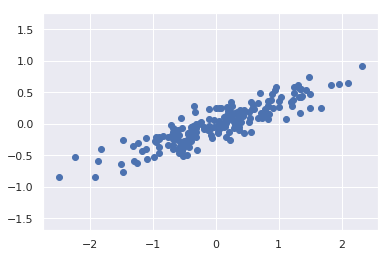

In [0]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Fit matrix

In [0]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Get values:

In [0]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [0]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


See what these numbers mean:


*  "components" defines the direction of the vector
*   "explained variance" defines the squared-length of the vector

**Note:** length of the vector is an indication of how "important" that axis is in describing the distribution of the data —more precisely, it is a measure of the variance of the data when projected onto that axis



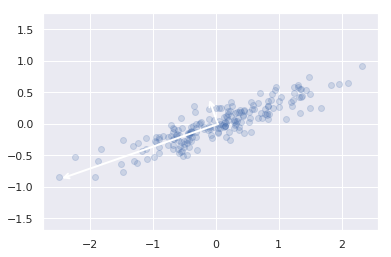

In [0]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

The projection of each data point onto the principal axes are the **"principal components"** of the data.

[(-3, 3.1),
 Text(0, 0.5, 'component 2'),
 (-5, 5),
 Text(0.5, 0, 'component 1'),
 Text(0.5, 1.0, 'principal components')]

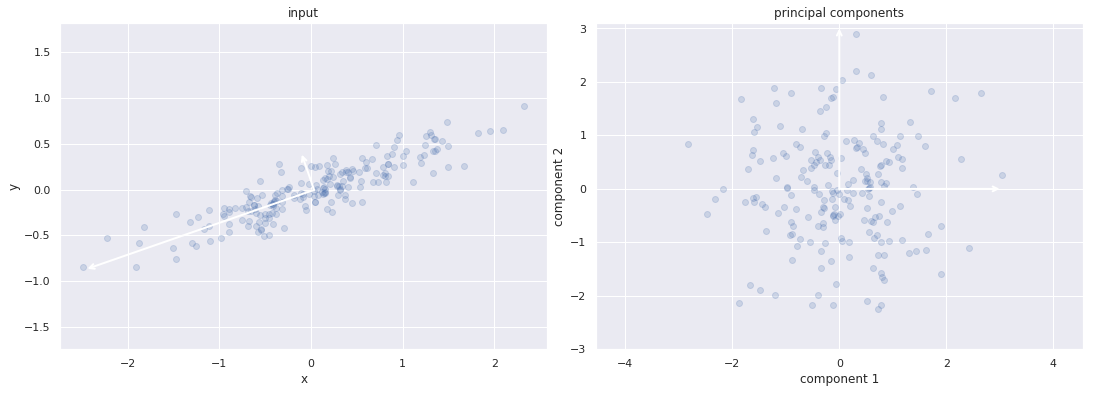

In [0]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))



## PCA as dimensionality reduction



**Credit goes to:** Jake VanderPlas

The Jupyter notebook version of the Python Data Science Handbook  is available on GitHub. If you find this content useful, please consider supporting the work by buying the book!

In [0]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension. 

Plot reduced data it along with the original data:

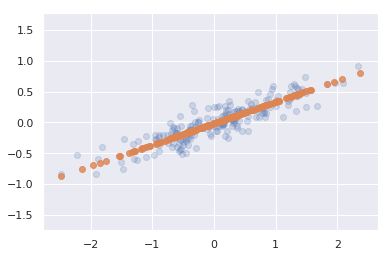

In [0]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');



*   Light points: original data
*   Orange points: projected data


Dimensionality reduction --> the information along the least important principal axis or axes is **removed**, leaving only the component(s) of the data with the **highest variance**.